In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib
from tkinter import *
import tkinter as tk
from tkinter import messagebox 
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("training_set_features.csv")
data_test = pd.read_csv("test_set_features.csv")

In [3]:
data_labels = pd.read_csv("training_set_labels.csv")

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
data.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

<Axes: >

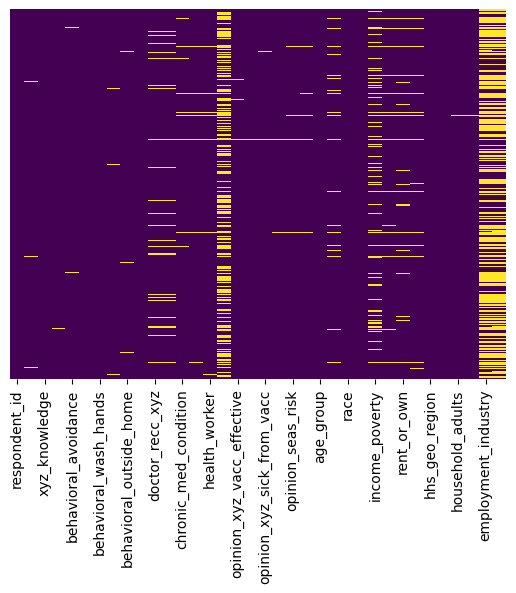

In [6]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [7]:
data.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
data = data.drop(['respondent_id','employment_occupation','employment_industry','health_insurance'],axis=1)
data_labels = data_labels.drop(['respondent_id'],axis=1)
data.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


<Axes: >

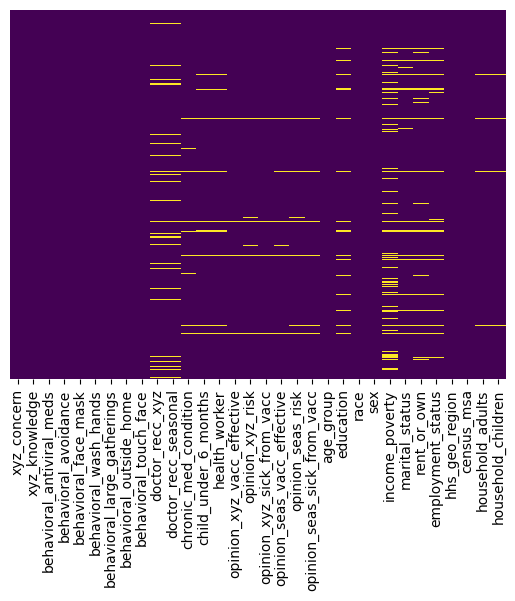

In [9]:
# List of columns to impute with mode
columns_to_impute = [
    'xyz_concern', 'xyz_knowledge',
    'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face'
]

# Function to impute missing values with mode
def impute_mode(df, columns):
    for column in columns:
        if df[column].isnull().sum() > 0:  # Check if there are missing values
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)

# Impute missing values in the specified columns
impute_mode(data, columns_to_impute)

sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [10]:
for column_name in data.columns:
    unique_values = data[column_name].unique()
    print(f"Column '{column_name}' unique values:")
    print(unique_values)
    print()

Column 'xyz_concern' unique values:
[1. 3. 2. 0.]

Column 'xyz_knowledge' unique values:
[0. 2. 1.]

Column 'behavioral_antiviral_meds' unique values:
[0. 1.]

Column 'behavioral_avoidance' unique values:
[0. 1.]

Column 'behavioral_face_mask' unique values:
[0. 1.]

Column 'behavioral_wash_hands' unique values:
[0. 1.]

Column 'behavioral_large_gatherings' unique values:
[0. 1.]

Column 'behavioral_outside_home' unique values:
[1. 0.]

Column 'behavioral_touch_face' unique values:
[1. 0.]

Column 'doctor_recc_xyz' unique values:
[ 0. nan  1.]

Column 'doctor_recc_seasonal' unique values:
[ 0. nan  1.]

Column 'chronic_med_condition' unique values:
[ 0.  1. nan]

Column 'child_under_6_months' unique values:
[ 0.  1. nan]

Column 'health_worker' unique values:
[ 0.  1. nan]

Column 'opinion_xyz_vacc_effective' unique values:
[ 3.  5.  4.  2.  1. nan]

Column 'opinion_xyz_risk' unique values:
[ 1.  4.  3.  2.  5. nan]

Column 'opinion_xyz_sick_from_vacc' unique values:
[ 2.  4.  1.  5.  

In [11]:

# Define the replacement mappings for education and income_poverty columns
replacement_map = {
    'education': {
        '< 12 Years': 1.0,
        '12 Years': 2.0,
        'Some College': 3.0,
        'College Graduate': 4.0
    },
    'income_poverty': {
        'Below Poverty': 1.0,
        '<= $75,000, Above Poverty': 2.0,
        '> $75,000': 3.0
    },
    'marital_status': {
        'Not Married': 0.0,
        'Married': 1.0
    },
    'employment_status': {
        'Not in Labor Force': 1.0,
        'Employed': 2.0,
        'Unemployed': 3.0
    },'age_group': {
        '18 - 34 Years': 1.0,
        '35 - 44 Years': 2.0,
        '45 - 54 Years': 3.0,
        '55 - 64 Years': 4.0,
        '65+ Years': 5.0
    }
}

# Apply replacement mapping to each specified column
for column, mapping in replacement_map.items():
    if column in data.columns:
        # Replace using the mapping
        data[column] = data[column].replace(mapping)

# Display the modified DataFrame
data.head()


C:\Users\shaur\AppData\Local\Temp\ipykernel_20224\3885309381.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,White,Female,1.0,0.0,Own,1.0,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,White,Male,1.0,0.0,Rent,2.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,White,Male,2.0,0.0,Own,2.0,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,White,Female,1.0,0.0,Rent,1.0,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,White,Female,2.0,1.0,Own,2.0,qufhixun,"MSA, Not Principle City",1.0,0.0


<Axes: xlabel='rent_or_own', ylabel='count'>

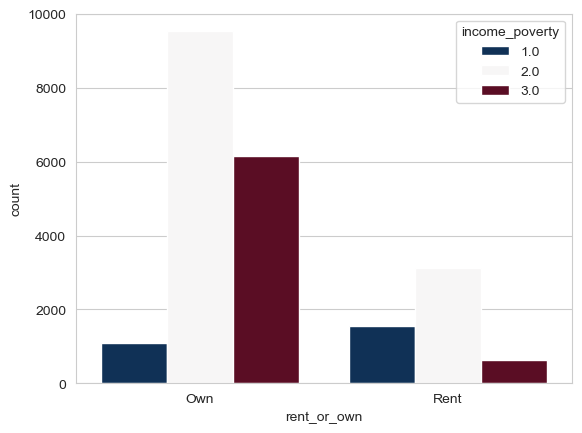

In [12]:
sns.set_style('whitegrid') 
sns.countplot(x='rent_or_own', hue='income_poverty', data=data, palette='RdBu_r')

In [13]:
columns_with_missing = [
    'education',
    'opinion_xyz_vacc_effective',
    'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'marital_status',
    'child_under_6_months',
    'chronic_med_condition'
]

# Check if there are missing values in the specified columns
for column in columns_with_missing:
    missing_count = data[column].isnull().sum()
    print(f"Number of missing values in '{column}': {missing_count}")

# Create a KNNImputer instance with appropriate parameters
imputer = KNNImputer(n_neighbors=10)  # You can adjust n_neighbors as needed

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(data[columns_with_missing])

# Replace the original columns with imputed values
data[columns_with_missing] = imputed_data

Number of missing values in 'education': 1407
Number of missing values in 'opinion_xyz_vacc_effective': 391
Number of missing values in 'opinion_xyz_risk': 388
Number of missing values in 'opinion_xyz_sick_from_vacc': 395
Number of missing values in 'opinion_seas_vacc_effective': 462
Number of missing values in 'opinion_seas_risk': 514
Number of missing values in 'opinion_seas_sick_from_vacc': 537
Number of missing values in 'marital_status': 1408
Number of missing values in 'child_under_6_months': 820
Number of missing values in 'chronic_med_condition': 971


In [14]:
# Identify columns with missing values
columns_with_missing = ['doctor_recc_xyz', 'doctor_recc_seasonal', 'income_poverty','employment_status','health_worker']

# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(data[columns_with_missing])

# Replace the original columns with imputed values
data[columns_with_missing] = imputed_data

In [15]:
# Condition to determine missing values in rent_or_own based on income_poverty
mask_missing_rent = data['rent_or_own'].isnull() & data['income_poverty'].notnull()

# Assign values based on income_poverty
data.loc[mask_missing_rent, 'rent_or_own'] = data.loc[mask_missing_rent, 'income_poverty'].apply(lambda x: 'Own' if x >= 2 else 'Rent')


<Axes: >

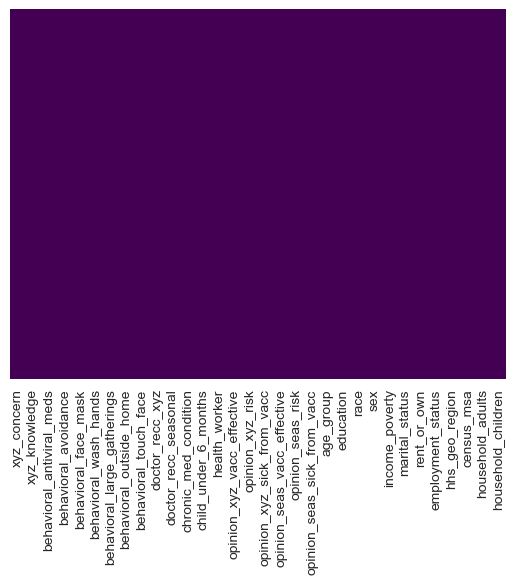

In [16]:
# Define the columns to be imputed
columns_to_impute = ['household_adults', 'household_children']

# Create the SimpleImputer instance with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the specified columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Visualize the missing data using a heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
data.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [18]:
data.tail()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,5.0,3.0,White,Female,2.00000,0.0,Own,1.000000,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,4.0,White,Male,2.00000,0.0,Rent,2.000000,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,4.0,3.0,White,Female,2.16395,0.0,Own,1.677329,lzgpxyit,"MSA, Not Principle City",0.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,Hispanic,Female,2.00000,1.0,Rent,2.000000,lrircsnp,Non-MSA,1.0,0.0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,3.0,White,Male,2.00000,1.0,Own,1.000000,mlyzmhmf,"MSA, Principle City",1.0,0.0


In [19]:
data_labels.head()

,xyz_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [20]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.188689,0.275427,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,0.0,2.0,2.0,0.0,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,2.0,1.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


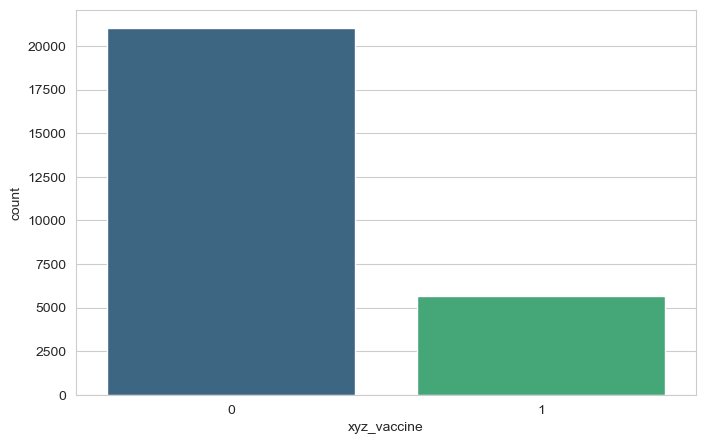

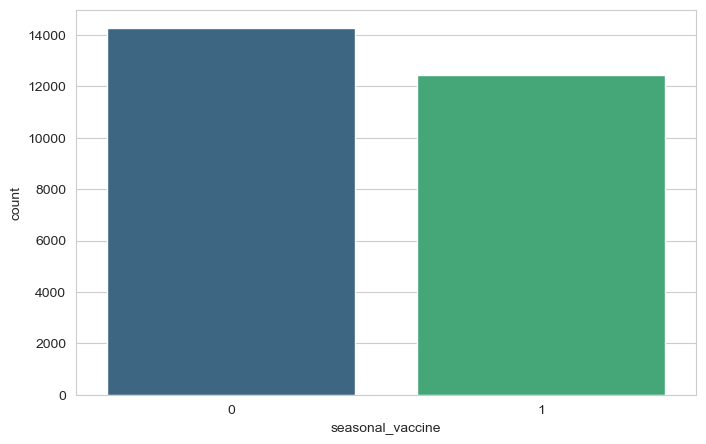

In [21]:
# Create the count plot
plt.figure(figsize=(8, 5))  # Optionally set the figure size
sns.countplot(x='xyz_vaccine', data=data_labels, palette='viridis', hue='xyz_vaccine', legend=False)  # Using a different palette for clarity
plt.show()
plt.figure(figsize=(8, 5))  # Optionally set the figure size
sns.countplot(x='seasonal_vaccine', data=data_labels, palette='viridis', hue='seasonal_vaccine', legend=False)  # Using a different palette for clarity
plt.show()

In [22]:
xyz_label = data_labels.drop(['seasonal_vaccine'],axis=1)
seasonal_label = data_labels.drop(['xyz_vaccine'],axis=1)
seasonal_label.head()

,seasonal_vaccine
0,0
1,1
2,0
3,1
4,0


In [23]:
data.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'marital_status', 'employment_status',
       'household_adults', 'household_children', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male', 'rent_or_own_Rent',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hh

In [24]:
xyz_data = data.drop(['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],axis=1)
seasonal_data = data.drop(['xyz_concern', 'xyz_knowledge','doctor_recc_xyz','opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'],axis=1)

In [25]:
xyz_data_res,xyz_label_res=SMOTE().fit_resample(data,xyz_label)
xyz_label_res.value_counts()

xyz_vaccine
0              21033
1              21033
Name: count, dtype: int64

In [26]:
xyz_data_train,xyz_data_test,xyz_label_train,xyz_label_test=train_test_split(xyz_data_res,xyz_label_res,test_size=0.40)
seasonal_data_train,seasonal_data_test,seasonal_label_train,seasonal_label_test=train_test_split(data,seasonal_label,test_size=0.40,stratify=seasonal_label)

In [27]:
sc=StandardScaler()
xyz_data_train=sc.fit_transform(xyz_data_train)
xyz_data_test = sc.transform(xyz_data_test)
seasonal_data_train=sc.fit_transform(seasonal_data_train)
seasonal_data_test = sc.transform(seasonal_data_test)

# XGB Classifier

In [28]:
model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

model.fit(xyz_data_train , xyz_label_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

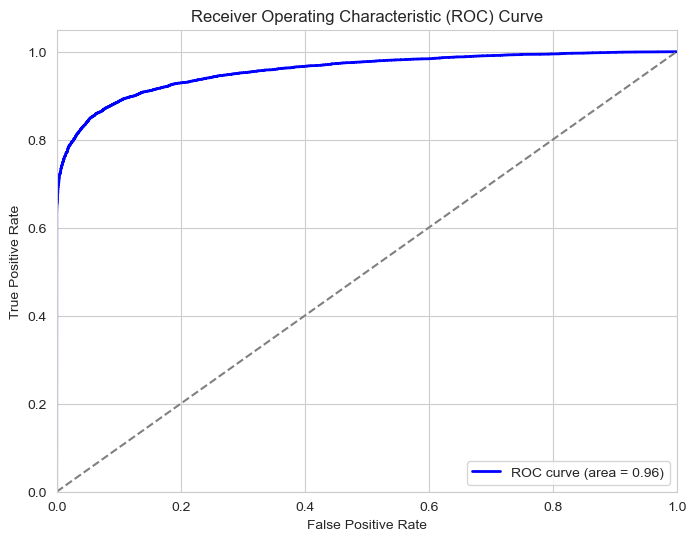

ROC AUC Score: 0.96


In [29]:
# Predict probabilities for the positive class
xyz_pred_proba = model.predict_proba(xyz_data_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(xyz_label_test, xyz_pred_proba)

# Calculate the AUC score
roc_auc = roc_auc_score(xyz_label_test, xyz_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc:.2f}')

In [30]:
model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

model.fit(seasonal_data_train , seasonal_label_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

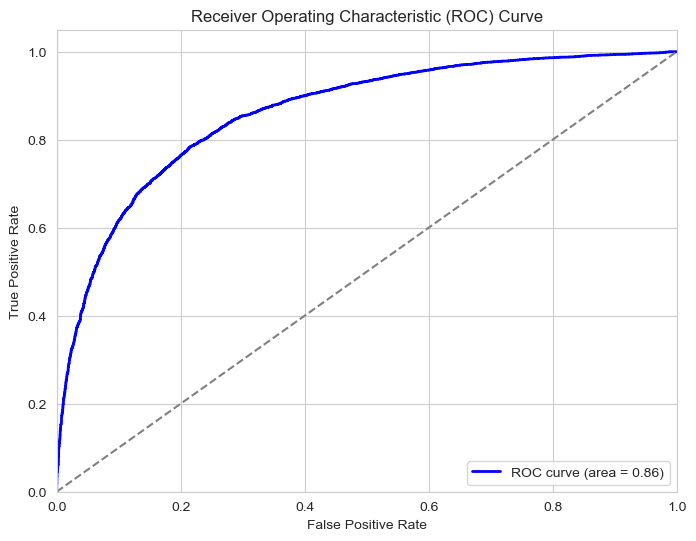

ROC AUC Score: 0.86


In [31]:
# Predict probabilities for the positive class
seasonal_pred_proba = model.predict_proba(seasonal_data_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(seasonal_label_test, seasonal_pred_proba)

# Calculate the AUC score
roc_auc = roc_auc_score(seasonal_label_test, seasonal_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc:.2f}')

# Final Model

In [32]:
xyz_model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)

xyz_model.fit(xyz_data_res,xyz_label_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
seasonal_model = XGBClassifier(colsample_bytree =0.8, gamma= 0.1 , learning_rate=0.05, max_depth= 5, n_estimators=200, subsample= 0.8)
seasonal_model.fit(data,seasonal_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
joblib.dump(xyz_model,'xyz')

['xyz']

In [35]:
joblib.dump(seasonal_model,'seasonal')

['seasonal']

In [36]:
xyz_model = joblib.load('xyz')
seasonal_model = joblib.load('seasonal')

# Handling Test Data

In [37]:
data = data_test

data = data.drop(['respondent_id','employment_occupation','employment_industry','health_insurance'],axis=1)

# List of columns to impute with mode
columns_to_impute = [
    'xyz_concern', 'xyz_knowledge',
    'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face'
]

# Function to impute missing values with mode
def impute_mode(df, columns):
    for column in columns:
        if df[column].isnull().sum() > 0:  # Check if there are missing values
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)

# Impute missing values in the specified columns
impute_mode(data, columns_to_impute)

# Define the replacement mappings for education and income_poverty columns
replacement_map = {
    'education': {
        '< 12 Years': 1.0,
        '12 Years': 2.0,
        'Some College': 3.0,
        'College Graduate': 4.0
    },
    'income_poverty': {
        'Below Poverty': 1.0,
        '<= $75,000, Above Poverty': 2.0,
        '> $75,000': 3.0
    },
    'marital_status': {
        'Not Married': 0.0,
        'Married': 1.0
    },
    'employment_status': {
        'Not in Labor Force': 1.0,
        'Employed': 2.0,
        'Unemployed': 3.0
    },'age_group': {
        '18 - 34 Years': 1.0,
        '35 - 44 Years': 2.0,
        '45 - 54 Years': 3.0,
        '55 - 64 Years': 4.0,
        '65+ Years': 5.0
    }
}

# Apply replacement mapping to each specified column
for column, mapping in replacement_map.items():
    if column in data.columns:
        # Replace using the mapping
        data[column] = data[column].replace(mapping)

columns_with_missing = [
    'education',
    'opinion_xyz_vacc_effective',
    'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'marital_status',
    'child_under_6_months',
    'chronic_med_condition'
]

# Check if there are missing values in the specified columns
for column in columns_with_missing:
    missing_count = data[column].isnull().sum()
    print(f"Number of missing values in '{column}': {missing_count}")

# Create a KNNImputer instance with appropriate parameters
imputer = KNNImputer(n_neighbors=10)  # You can adjust n_neighbors as needed

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(data[columns_with_missing])

# Replace the original columns with imputed values
data[columns_with_missing] = imputed_data

# Identify columns with missing values
columns_with_missing = ['doctor_recc_xyz', 'doctor_recc_seasonal', 'income_poverty','employment_status','health_worker']

# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
imputed_data = imputer.fit_transform(data[columns_with_missing])

# Replace the original columns with imputed values
data[columns_with_missing] = imputed_data

# Condition to determine missing values in rent_or_own based on income_poverty
mask_missing_rent = data['rent_or_own'].isnull() & data['income_poverty'].notnull()

# Assign values based on income_poverty
data.loc[mask_missing_rent, 'rent_or_own'] = data.loc[mask_missing_rent, 'income_poverty'].apply(lambda x: 'Own' if x >= 2 else 'Rent')

# Define the columns to be imputed
columns_to_impute = ['household_adults', 'household_children']

# Create the SimpleImputer instance with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the specified columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

data.isnull().sum()

C:\Users\shaur\AppData\Local\Temp\ipykernel_20224\301513646.py:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)


Number of missing values in 'education': 1407
Number of missing values in 'opinion_xyz_vacc_effective': 398
Number of missing values in 'opinion_xyz_risk': 380
Number of missing values in 'opinion_xyz_sick_from_vacc': 375
Number of missing values in 'opinion_seas_vacc_effective': 452
Number of missing values in 'opinion_seas_risk': 499
Number of missing values in 'opinion_seas_sick_from_vacc': 521
Number of missing values in 'marital_status': 1442
Number of missing values in 'child_under_6_months': 813
Number of missing values in 'chronic_med_condition': 932


xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [38]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,employment_status,household_adults,household_children,race_Hispanic,race_Other or Multiple,race_White,sex_Male,rent_or_own_Rent,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,2.0,4.0,3.0,0.0,2.0,1.0,0.0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,3.0,0.0,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,0.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


# Final Output

In [39]:
xyz_pred_proba = xyz_model.predict_proba(data)[:, 1]

In [40]:
seasonal_pred_proba = seasonal_model.predict_proba(data)[:, 1]

In [41]:
# Check if the length of the arrays matches the number of rows in data_test
if len(xyz_pred_proba) != len(data_test) or len(seasonal_pred_proba) != len(data_test):
    raise ValueError("The length of the prediction arrays must match the number of rows in data_test")

# Extract the respondent_id column
respondent_id = data_test['respondent_id']

# Create a new DataFrame with respondent_id and the predictions
final_data = pd.DataFrame({
    'respondent_id': respondent_id,
    'xyz_vaccine': xyz_pred_proba,
    'seasonal_vaccine': seasonal_pred_proba
})

# Print the new DataFrame
final_data.head()


,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.133979,0.181299
1,26708,0.057474,0.045094
2,26709,0.644414,0.821795
3,26710,0.644994,0.876764
4,26711,0.219364,0.439633
